## Original

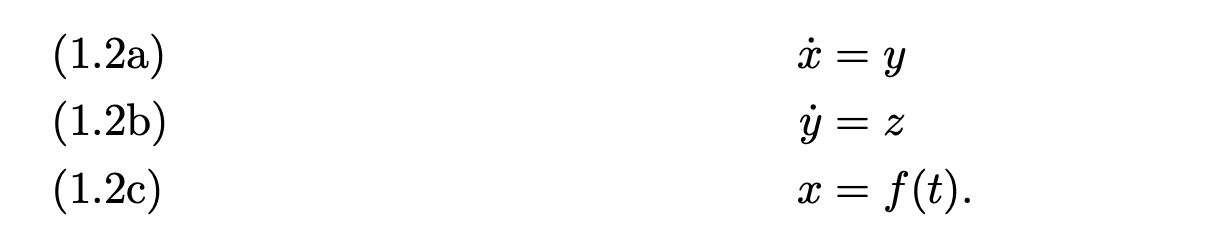

## After differentiation

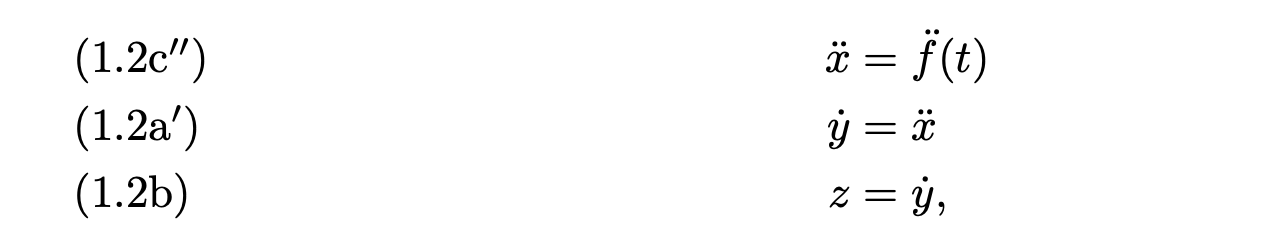

## All

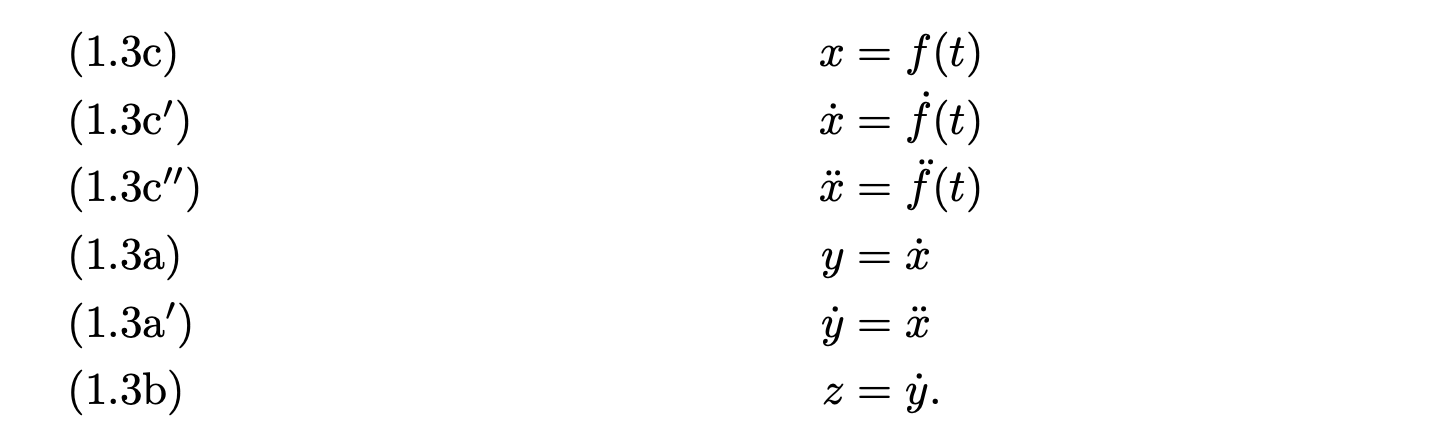

## After dummy derivatives

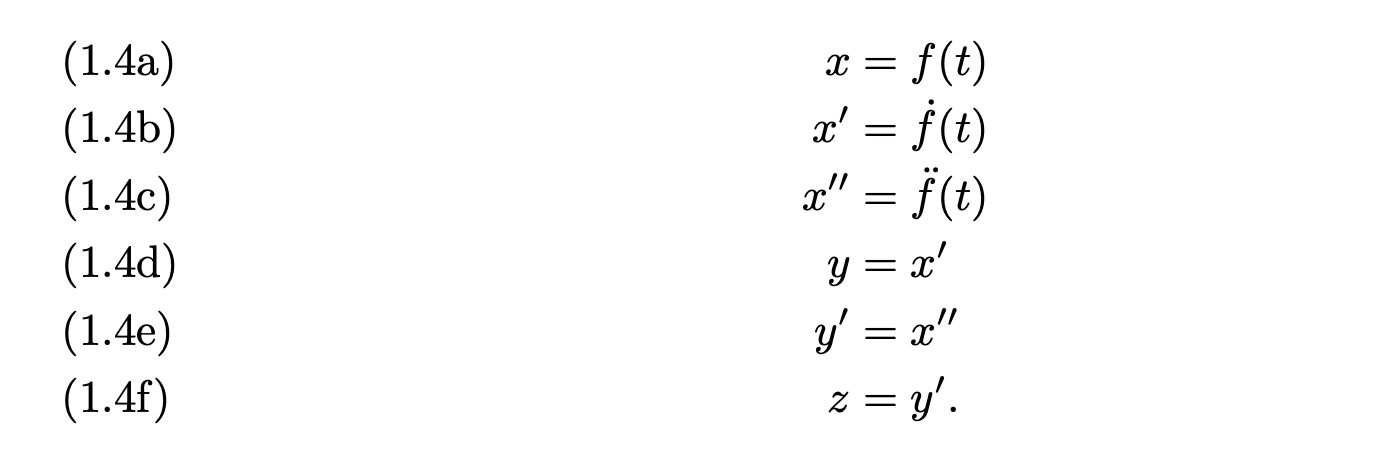

In [1]:
import networkx as nx
import sympy as sp

sp.init_printing()

from index_reduction import IndexReduction, draw_graph

%load_ext autoreload
%autoreload 2

In [2]:
def pprint(exprs, heading="expressions"):
    print(heading)
    for expr in exprs:
        display(expr)

In [3]:
# Define the symbol for time
t = sp.symbols("t")

# Define symbols
f = sp.Function("f")(t)  # make f time-varying for testing a time-varying parameter

# Define functions of time
x = sp.Function("x")(t)
y = sp.Function("y")(t)
z = sp.Function("z")(t)


# knowns
knowns = [f]

# Define the derivatives of these functions with respect to time
xdot = x.diff(t)
ydot = y.diff(t)

# Define equations
eq0 = xdot - y
eq1 = ydot - z
eq2 = x - f

# Equations list
eqs = [eq0, eq1, eq2]

# pprint(eqs, "Equations")

In [4]:
ir = IndexReduction(t, eqs, knowns, notebook=True)

In [5]:
ir.x

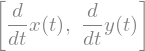

In [6]:
ir.x_dot

In [7]:
ir.y

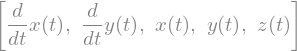

In [8]:
ir.X

In [9]:
ir.A

[None, None, 0, 1, None]

In [10]:
ir.M

In [11]:
ir.N

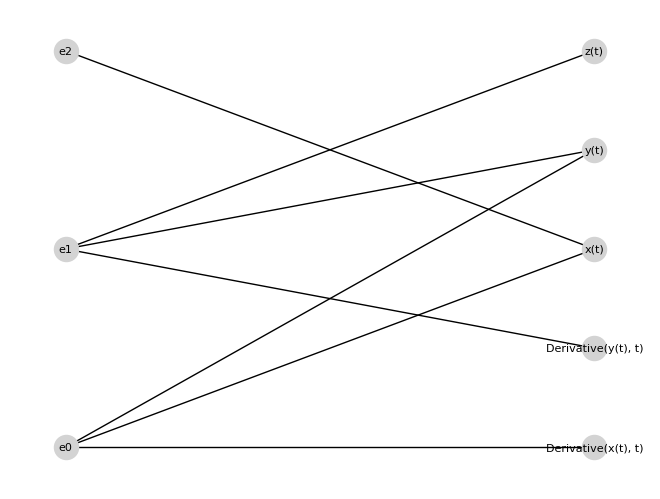

In [12]:
draw_graph(ir.G)

In [13]:
ir.pantelides()

# Panteides Algorithm Completed 

Total equations (before|after): 3|6
Total variables (before|after): 5|6


Variables 

[Derivative(x(t), t), Derivative(y(t), t), x(t), y(t), z(t), Derivative(x(t), (t, 2))]


Equations 

-y(t) + Derivative(x(t), t)
-z(t) + Derivative(y(t), t)
-f(t) + x(t)
-Derivative(f(t), t) + Derivative(x(t), t)
Derivative(x(t), (t, 2)) - Derivative(y(t), t)
-Derivative(f(t), (t, 2)) + Derivative(x(t), (t, 2))


# Variable assignments
Variable Derivative(x(t), t) is assigned to -> e0
Variable Derivative(y(t), t) is assigned to -> e4
Variable x(t) is assigned to -> 
Variable y(t) is assigned to -> 
Variable z(t) is assigned to -> e1
Variable Derivative(x(t), (t, 2)) is assigned to -> e5


# Differentiated equations
Differentiate e0 to get  -> e4
Differentiate e1 to get  -> 
Differentiate e2 to get  -> e3
Differentiate e3 to get  -> e5
Differentiate e4 to get  -> 
Differentiate e5 to get  -> 


# Derivatives present in the variable association list
Present derivative o

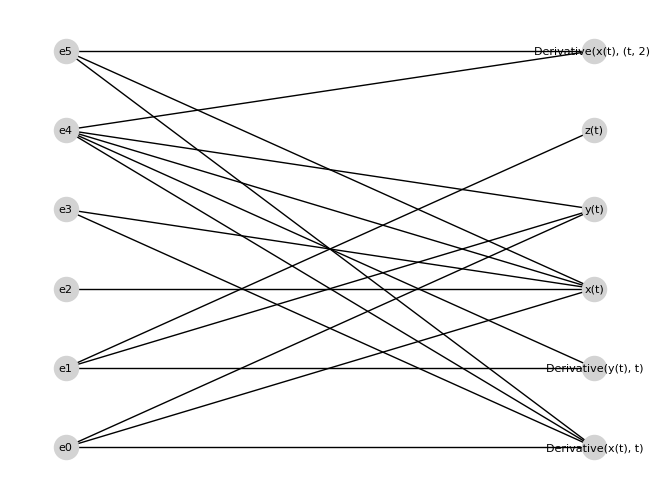

In [14]:
draw_graph(ir.G)

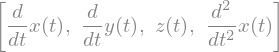

In [15]:
ir.pantelides_vars

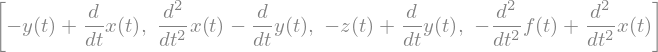

In [16]:
ir.pantelides_eqs

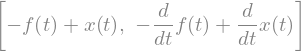

In [17]:
ir.pantelides_removed_eqs

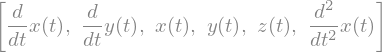

In [18]:
ir.X

In [19]:
ir.make_BLT_graph()

equation e1 is matched to variable v4
and contains the following variables: {Derivative(y(t), t), z(t)}
with indices: [1, 4] 

equation e4 is matched to variable v1
and contains the following variables: {Derivative(x(t), (t, 2)), Derivative(y(t), t)}
with indices: [5, 1] 

equation e5 is matched to variable v5
and contains the following variables: {Derivative(x(t), (t, 2))}
with indices: [5] 

BLT equation ordering
['e5', 'e4', 'e1']
BLT variable ordering
[Derivative(x(t), (t, 2)), Derivative(y(t), t), z(t)]


In [20]:
ir.BLT_graph

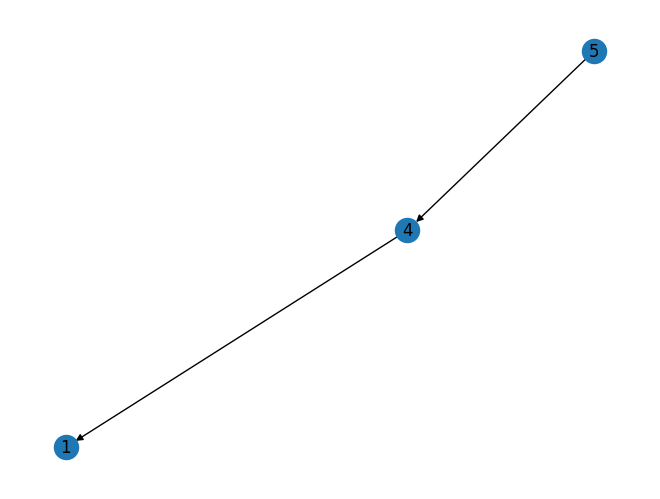

In [21]:
nx.draw(ir.BLT_graph, with_labels=True)

In [22]:
ir.e_mapping

{'e0': 0, 'e1': 1, 'e2': 2, 'e3': 3, 'e4': 4, 'e5': 5}

In [23]:
ir.v_mapping

{'Derivative(x(t), t)': 0,
 'Derivative(y(t), t)': 1,
 'x(t)': 2,
 'y(t)': 3,
 'z(t)': 4,
 'Derivative(x(t), (t, 2))': 5}

In [24]:
ir.assign

[0, 4, None, None, 1, 5]

In [25]:
ir.matching

In [26]:
blt = list(nx.strongly_connected_components(ir.BLT_graph))

In [27]:
type(blt[0])

set

In [28]:
ir.BLT

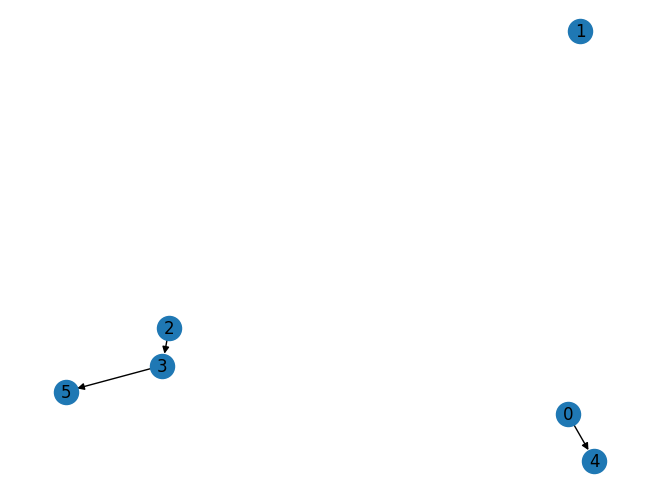

In [29]:
nx.draw(ir.eq_diff_graph, with_labels=True)

In [30]:
ir.p_dae_eqs

In [31]:
ir.dummy_derivatives()

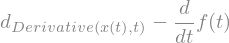

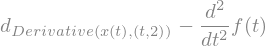

In [32]:
for eq in ir.final_dae_eqs:
    display(eq)

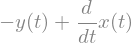

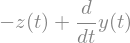

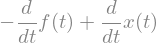

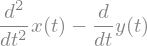

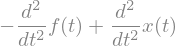

In [33]:
for eq in ir.eqs:
    display(eq)